<a href="https://colab.research.google.com/github/adong-hood/cs200/blob/main/SQL_recap_and_9_9_9_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to SQL

## 1. Preparation

We start by setting up a connection to our sample database, Northwind DB.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# download Northwind SQLite DB
!wget https://tdmdal.github.io/mma-sql-2021/data/northwind.sqlite3

In [ ]:
%pip install jupysql

In [ ]:
# load the SQL magic extension
# https://github.com/catherinedevlin/ipython-sql
# this extension allows us to connect to DBs and issue SQL command
%load_ext sql

In [ ]:
# now we can use the magic extension to connect to our SQLite DB
# use %sql to write an inline SQL command
# use %%sql to write SQL commands in a cell
%sql sqlite:///northwind.sqlite3

After connecting to the Northwind DB, let's first check what database engine we are using.

In [ ]:
%sql SELECT sqlite_version();

We are using [SQLite 3](https://www.sqlite.org/index.html). It's a small and fast Relational Database engine. SQLite DB is self-contained: one database is just a file. Believe it or not, SQLite is the most used DB engine in the world. It's built into millions of mobile phones (e.g. Android or iOS phones) and it's used by many popular apps to store data.  

## 2. A quick look at Northwind DB

### How many tables does this DB have?

A database may contain many tables. Let's see how many tables we have in the Northwind DB.

Every SQLite database has a special table called `sqlite_master`. It contains a master listing of all database objects (tables, indexes, etc.) in the database and the SQL used to create each object. We can query this table to find out how many tables (excluding `sqlite_master`) we have in our Northwind DB.

We will use SQL keywords `SELECT...FROM...WHERE`. Don't worry about them for now. We will soon learn those keywords.

In [ ]:
%%sql
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

In [ ]:
%sql SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

Note that special tables in SQLite start with `sqlite_`. Those are reserved tables for SQLite engine system use. Above we filtered out those tables. In most cases, we shouldn't touch those special tables.

### How does the Categories table look like?

A table is made up of one or more columns/fields. Let's take a look a the Categories table (column names, types, etc.).

In [ ]:
%sql PRAGMA table_info([Categories]);

### How about the relationships between the tables?

We present the relationships between the tables using an Entity Relationship (ER) diagram.

<img src="https://tdmdal.github.io/mma-sql-2021/images/NW_ER.png" alt="ER Diagram" width="669" height="484" />

In the above ER diagram, the tiny vertical key icon indicates a column is a primary key. A primary key is a column (or set of columns) whose values uniquely identify every row in a table. For example, `OrderID` is the primary key in the `Orders` table, and `OrderID` and `ProductID` (combined) is the primary key in the `OrderDetails` table.

The relationship icon (a line with a horizontal key at one end and an infinite symbol at the other end) indicates a foreign key constraint and a one-to-many relationship. A foreign key is a column (or set of columns) in one table whose values uniquely identify a row of another table or the same table. A foreign key mostly refers to a primary key in another table. A foreign key constraint requires that the constrained column contain only values from the primary key column of the other table. For example `CustomerID` in the `Orders` table is a foreign key that refers to the `CustomerID` primary key in the `Customers` table, and it can only contain values that exist in the `CustomerID` column of the `Customers` table.

In addition, it happens that every foreign key constraint in the Northwind DB establishes a one-to-many relationship, i.e. a row from one table can have multiple matching rows in another table. For example, one row from the `Customers` table can match multiple rows in the `Orders` table (via `CustomerID`). This makes sense as one customer can place more than one orders. (Another common relationship a foreign key constraint can establish is the one-to-one relationship.)

|logo|meaning|
|:------:|:------:|
|![key logo](https://tdmdal.github.io/mma-sql-2021/images/key_vertical.png "key logo")|primary key|
|![foreign key constraint](https://tdmdal.github.io/mma-sql-2021/images/relationship.png "foreign key constraint")|one-to-many foreign key contraint|

**Question**: Why do we need foreign key constraints? (Discussion)

You can find out relationships between tables by querying the `sqlite_master` table. See the code below.

Of course, querying the `sqlite_master` table to find out relationships between tables is specific to SQLite. We would do it differently if we use other database management systems. For example, if we use MySQL system, we would query the `key_column_usage` table in the `information_schema` DB. See this stackoverflow [question](https://stackoverflow.com/questions/20855065/how-to-find-all-the-relations-between-all-mysql-tables).

Alternatively, some SQL client tools can generate ER diagram for you. The above diagram is generated by SQL Server Management Studio (SSMS). The Northwind DB is a sample DB originally shipped with Microsoft SQL Server.

In [ ]:
%%sql
SELECT sql
FROM sqlite_master
WHERE name = "Orders"

## Exercises

**We will work on the problems with a * sign together.** Other problems are left for homework.


## Part 1. Warm-up

We review

1. Retrieve data: `SELECT...FROM...`
2. Sort retrieved data: `SELECT...FROM...ORDER BY...`
3. Filter data: `SELECT...FROM...WHERE...`; `IN`, `NOT`, `LIKE` and `%` wildcard
4. Create calculated fields: mathematical calculations (e.g. +, -, *, /); data manipulation functions (e.g. `DATE()`, `||`)

### Ex1*. What kind of categories do we have in this database?

Display `CategoryName` and `Description` in the `Categories` table. You can use PRAGMA command to check out the columns.

In [ ]:
%sql PRAGMA table_info([Categories]);

Running query in 'sqlite:///northwind.sqlite3'

cid,name,type,notnull,dflt_value,pk
0,CategoryID,INTEGER,1,None,1
1,CategoryName,nvarchar(15),1,None,0
2,Description,ntext,0,None,0
3,Picture,image,0,None,0


In [ ]:
%%sql
select CategoryName, Description
from Categories

Running query in 'sqlite:///northwind.sqlite3'

CategoryName,Description
Beverages,"Soft drinks, coffees, teas, beers, and ales"
Condiments,"Sweet and savory sauces, relishes, spreads, and seasonings"
Confections,"Desserts, candies, and sweet breads"
Dairy Products,Cheeses
Grains/Cereals,"Breads, crackers, pasta, and cereal"
Meat/Poultry,Prepared meats
Produce,Dried fruit and bean curd
Seafood,Seaweed and fish


In [ ]:
# Just curious, what's in the picture column?
result = %sql SELECT CategoryName, Picture FROM Categories;
result.DataFrame().loc[0, 'Picture']

<PIL.BmpImagePlugin.BmpImageFile image mode=P size=172x120 at 0x7C83B22ED590>


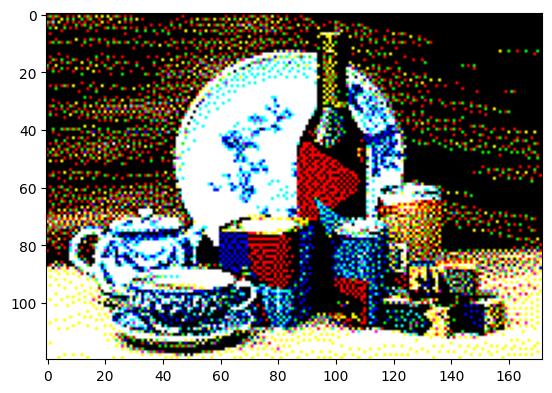

In [ ]:
# still curious about the picture column?
# image is actually stored as a blob (Binary Large Object) in SQLite
from matplotlib.pyplot import imshow
from PIL import Image
from io import BytesIO
%matplotlib inline
row = 0
im = Image.open(BytesIO(result.DataFrame().loc[row, 'Picture'][78:])) # cut the first 78 bytes (OLE header)
print(im)
imshow(im)

### Ex2. List all the shippers (shipping companies) in the database.

In [ ]:
%%sql
-- start your code here



Running query in 'sqlite:///northwind.sqlite3'

ShipperID,CompanyName,Phone
1,Speedy Express,(503) 555-9831
2,United Package,(503) 555-3199
3,Federal Shipping,(503) 555-9931


### Ex3* Find the names and hire dates of all US sales representatives (Employees).

The resulting table should display `FirstName`, `LastName`, `HireDate`, `Title` and `Country`.

In [ ]:
%%sql
-- take a look at the Employees table first
-- use LIMIT to limit the rows being displayed


Running query in 'sqlite:///northwind.sqlite3'

FirstName,LastName,HireDate,Title,Country
Nancy,Davolio,2010-05-01 00:00:00.000,Sales Representative,USA
Andrew,Fuller,2010-08-14 00:00:00.000,"Vice President, Sales",USA
Janet,Leverling,2010-04-01 00:00:00.000,Sales Representative,USA
Margaret,Peacock,2011-05-03 00:00:00.000,Sales Representative,USA
Steven,Buchanan,2011-10-17 00:00:00.000,Sales Manager,UK
Michael,Suyama,2011-10-17 00:00:00.000,Sales Representative,UK
Robert,King,2012-01-02 00:00:00.000,Sales Representative,UK
Laura,Callahan,2012-03-05 00:00:00.000,Inside Sales Coordinator,USA
Anne,Dodsworth,2012-11-15 00:00:00.000,Sales Representative,UK


### Ex4. Find the supplier contacts who are *not* marketing managers.

Display `supplierID`, `ContactNames` and `ContactTitle` for those whose `ContactTitle` is *not* Marketing Manager.

Hint: `NOT` operator.

In [ ]:
%%sql
-- start your code here


Running query in 'sqlite:///northwind.sqlite3'

SupplierID,ContactName,ContactTitle
1,Charlotte Cooper,Purchasing Manager
2,Shelley Burke,Order Administrator
3,Regina Murphy,Sales Representative
5,Antonio del Valle Saavedra,Export Administrator
6,Mayumi Ohno,Marketing Representative
8,Peter Wilson,Sales Representative
9,Lars Peterson,Sales Agent
11,Petra Winkler,Sales Manager
12,Martin Bein,International Marketing Mgr.
13,Sven Petersen,Coordinator Foreign Markets


### Ex.5 Find the products with "Chef" in their names.

Hint: `LIKE` operator and `%` wildcard, for example, like '%Chef%'

In [ ]:
%%sql
-- start your code here



Running query in 'sqlite:///northwind.sqlite3'

ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22,53,0,0,0
5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


## Part 2. Summarize and Group Data

1. Summarize data using aggregate functions (e.g. `COUNT()`, `MIN()`, `MAX()`, and `AVG()`).
2. Group data and filter groups: `SELECT...FROM...GROUP BY...HAVING...`.
3. `SELECT` clause ordering: `SELECT...FROM...WHERE...GROUP BY...HAVING...ORDER BY...`.
4. Filter data by *subquery*: `SELECT...FROM...WHERE...(SELECT...FROM...)`

### Ex.5* Count the total number of order items. List the minimum, maximum and average prices of order items.

Note that the question asks about order items (not orders). One order may contain multiple items/products. An order item is identified by (OrderID + ProductID).

In [ ]:
%%sql
-- start your code here


Running query in 'sqlite:///northwind.sqlite3'

total_items,min_price,max_price,avg_price
2155,2,263.5,26.238134570765723


### Ex. 6 How many customers do we have for each contact title?

Order the result by the count of contact titles.

In [ ]:
%%sql
-- start your code here



Running query in 'sqlite:///northwind.sqlite3'

ContactTitle,count
Sales Representative,17
Owner,17
Marketing Manager,12
Sales Manager,11
Accounting Manager,10
Sales Associate,7
Marketing Assistant,6
Sales Agent,5
Order Administrator,2
Assistant Sales Agent,2


### Ex.7 Find the total number of customers per country and city.

In [ ]:
%%sql
-- start your code here


Running query in 'sqlite:///northwind.sqlite3'

Country,City,count(*)
Argentina,Buenos Aires,3
Austria,Graz,1
Austria,Salzburg,1
Belgium,Bruxelles,1
Belgium,Charleroi,1
Brazil,Campinas,1
Brazil,Resende,1
Brazil,Rio de Janeiro,3
Brazil,Sao Paulo,4
Canada,Montréal,1


## Part 3. Join Tables

1. Inner join: `SELECT...FROM...INNER JOIN...ON...`
2. Left join:  `SELECT...FROM...LEFT JOIN...ON...`
3. Other joins.

### Ex.8* List products and their associated suppliers.

Display the `ProductID`, `ProductName`, and the `CompanyName` of the Supplier. Sort by `ProductID`.

We can use the `WHERE` keyword.

In [ ]:
%%sql
-- start your code here


We can also use the `(INNER) JOIN` keyword.

In [ ]:
%%sql
-- start your code here


# Getting SQL Data into a DataFrame (9.9)

In [ ]:
import pandas as pd
import sqlite3


In [ ]:
# connect to the database
con = sqlite3.connect('/content/drive/MyDrive/cs200/datasets/bikeshare_11_12.db')

In [ ]:
stations = pd.read_sql_query("select * from bikeshare_stations where latitude is not NULL",con)
stations.head()

,station_id,name,status,latitude,longitude
0,31620,5th & F St NW,open,38.896301,-77.027463
1,31105,14th & Harvard St NW,open,38.926571,-77.032414
2,31400,Georgia & New Hampshire Ave NW,open,39.221500,-77.059858
3,31111,10th & U St NW,open,38.916804,-77.026235
4,31104,Adams Mill & Columbia Rd NW,open,38.922680,-77.042667


In [ ]:
trips = pd.read_sql_query("select * from trip_data",con)
trips.head()

,duration,start_date,end_date,start_station,end_station,bike_number,member_type
0,3548,2011-01-01 00:01:29.000000,2011-01-01 01:00:37.000000,31620,31620,W00247,Member
1,346,2011-01-01 00:02:46.000000,2011-01-01 00:08:32.000000,31105,31101,W00675,Casual
2,562,2011-01-01 00:06:13.000000,2011-01-01 00:15:36.000000,31400,31104,W00357,Member
3,434,2011-01-01 00:09:21.000000,2011-01-01 00:16:36.000000,31111,31503,W00970,Member
4,233,2011-01-01 00:28:26.000000,2011-01-01 00:32:19.000000,31104,31106,W00346,Casual


In [ ]:
trips.dtypes

,0
duration,int64
start_date,object
end_date,object
start_station,int64
end_station,int64
bike_number,object
member_type,object


In [ ]:
trips = pd.read_sql_query("select * from trip_data",con, parse_dates = {'start_date':'%Y-%m-%d %H:%M:%S.%f', 'end_date':'%Y-%m-%d %H:%M:%S.%f'})
trips.dtypes

,0
duration,int64
start_date,datetime64[ns]
end_date,datetime64[ns]
start_station,int64
end_station,int64
bike_number,object
member_type,object


### Q-1: What is the type of the calc_duration field that you just computed?

### Q-2: Paste the value for the first row here:    and the last row here:


# Mapping Bike Stations Using Colab (9.10)

This section will show you how to map our bikeshare data on Google Colab.  We will be using the package folium which is a module that allows for mapping static data in both Jupyter Notebooks and Colab.

In [ ]:
import folium

In [ ]:

# locations of all stations.
Locations = list(zip(stations.latitude, stations.longitude))
dc_center = (38.9072, -77.0369)


dcmap = folium.Map(location=dc_center, zoom_start=12)


for loc in Locations:
   markers = folium.CircleMarker(location=loc,radius=5,fill=True, fill_opacity=1)
   dcmap.add_child(markers)

dcmap

### Q1. The map seems a little busy with all those markers. Redo the map so that it only shows the 20 busiest stations. That is the top 20 start stations with the highest number of trips.